In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
import requests
%matplotlib inline

In [2]:
df=pd.read_excel('C:\\Users\\nafissaad\Downloads\\Spreadsheets-20231017T124722Z-001\\Spreadsheets\\NEDL_Regret_aversion.xlsx',index_col='Date')
df=df.dropna(axis=1)
df.columns=df.loc['NaT']
df=df[1:]
df

NaT,AAPL,CAT,CVX,JPM,WMT
Date,,,,,
2011-12-30,12.350067,67.29747,68.59333,24.46443,46.885895
2012-01-03,12.54005,69.808136,71.152679,25.737314,47.333115
2012-01-04,12.607438,70.454361,71.030167,25.900354,46.846676
2012-01-05,12.747407,70.952034,70.333946,26.441336,46.619144
2012-01-06,12.880666,71.130318,69.824631,26.204182,46.289627
...,...,...,...,...,...
2021-12-27,179.586868,202.989365,115.5467,153.32074,139.104004
2021-12-28,178.551147,203.225418,115.322968,153.786026,141.100235
2021-12-29,178.640778,203.923752,114.729622,153.708481,141.031082


In [3]:
(176.838242/12.350067)**(1/10)-1

0.3049404322609892

In [4]:
returns=df.pct_change()
returns

NaT,AAPL,CAT,CVX,JPM,WMT
Date,,,,,
2011-12-30,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.015383,0.037307,0.037312,0.052030,0.009538
2012-01-04,0.005374,0.009257,-0.001722,0.006335,-0.010277
2012-01-05,0.011102,0.007064,-0.009802,0.020887,-0.004857
2012-01-06,0.010454,0.002513,-0.007241,-0.008969,-0.007068
...,...,...,...,...,...
2021-12-27,0.022975,0.000873,0.020445,0.005723,0.009105
2021-12-28,-0.005767,0.001163,-0.001936,0.003035,0.014351
2021-12-29,0.000502,0.003436,-0.005145,-0.000504,-0.000490


In [5]:
returns['Best']=returns.max(axis=1)
returns

NaT,AAPL,CAT,CVX,JPM,WMT,Best
Date,,,,,,
2011-12-30,NaN,NaN,NaN,NaN,NaN,NaN
2012-01-03,0.015383,0.037307,0.037312,0.052030,0.009538,0.052030
2012-01-04,0.005374,0.009257,-0.001722,0.006335,-0.010277,0.009257
2012-01-05,0.011102,0.007064,-0.009802,0.020887,-0.004857,0.020887
2012-01-06,0.010454,0.002513,-0.007241,-0.008969,-0.007068,0.010454
...,...,...,...,...,...,...
2021-12-27,0.022975,0.000873,0.020445,0.005723,0.009105,0.022975
2021-12-28,-0.005767,0.001163,-0.001936,0.003035,0.014351,0.014351
2021-12-29,0.000502,0.003436,-0.005145,-0.000504,-0.000490,0.003436


In [6]:
regret=returns[returns.columns[:-1]].sub(returns['Best'],axis=0)
regret

NaT,AAPL,CAT,CVX,JPM,WMT
Date,,,,,
2011-12-30,NaN,NaN,NaN,NaN,NaN
2012-01-03,-0.036647,-0.014723,-0.014718,0.000000,-0.042492
2012-01-04,-0.003883,0.000000,-0.010979,-0.002922,-0.019534
2012-01-05,-0.009785,-0.013823,-0.030689,0.000000,-0.025744
2012-01-06,0.000000,-0.007941,-0.017695,-0.019423,-0.017522
...,...,...,...,...,...
2021-12-27,0.000000,-0.022102,-0.002530,-0.017252,-0.013870
2021-12-28,-0.020118,-0.013188,-0.016287,-0.011316,0.000000
2021-12-29,-0.002934,0.000000,-0.008581,-0.003940,-0.003926


In [7]:
regret_cov=regret.cov()*252
regret_cov

NaT,AAPL,CAT,CVX,JPM,WMT
NaT,,,,,
AAPL,0.060656,0.010321,0.007854,0.009140,0.016523
CAT,0.010321,0.056968,0.025024,0.024877,0.013941
CVX,0.007854,0.025024,0.058073,0.027683,0.013149
JPM,0.009140,0.024877,0.027683,0.051337,0.014407
WMT,0.016523,0.013941,0.013149,0.014407,0.058246


In [8]:
matrix=pd.DataFrame(columns=[regret.columns],index=['Return','Risk','Regret','Weights'])
matrix

NaT,AAPL,CAT,CVX,JPM,WMT
Return,NaN,NaN,NaN,NaN,NaN
Risk,NaN,NaN,NaN,NaN,NaN
Regret,NaN,NaN,NaN,NaN,NaN
Weights,NaN,NaN,NaN,NaN,NaN


In [9]:
matrix.loc['Return']=(((df[-1:].values/df[0:1].values)**(1/10))-1)[0].tolist()
matrix.loc['Risk']=[(returns[i].std())*np.sqrt(252) for i in df.columns]
matrix.loc['Regret']=[(regret[i].std())*np.sqrt(252) for i in df.columns]
matrix.loc['Weights']=1/5
matrix

NaT,AAPL,CAT,CVX,JPM,WMT
Return,0.30494,0.116923,0.052247,0.201597,0.117958
Risk,0.283525,0.27652,0.275257,0.266762,0.194395
Regret,0.246284,0.238679,0.240983,0.226577,0.241342
Weights,0.2,0.2,0.2,0.2,0.2


In [10]:
Portfolio_Return=matrix.loc['Return'].dot(matrix.loc['Weights'])
regret_return=np.sqrt((matrix.loc['Weights'].dot(regret_cov.values)).dot(matrix.loc['Weights'].T))
Portfolio_Return,regret_return

(0.158733161376016, 0.15634819431321548)

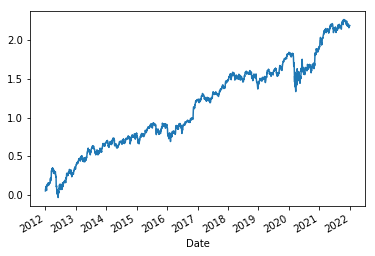

In [11]:
returns['JPM'].cumsum().plot()

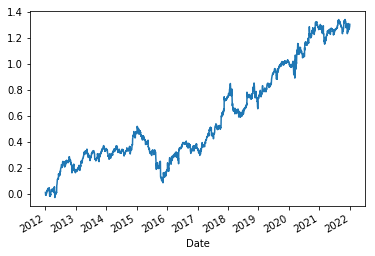

In [12]:
returns['WMT'].cumsum().plot()

In [13]:
#in general stats says WMT is less riskey stock but in regret wise JPM is less riskey stock